<a href="https://colab.research.google.com/github/vasuki-a205510/MIML/blob/main/Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Generate the first four features from a standard normal distribution
np.random.seed(42) # for reproducibility
f1 = np.random.randn(50, 1)
f2 = np.random.randn(50, 1)
f3 = np.random.randn(50, 1)
f4 = np.random.randn(50, 1)

# Define the fifth and sixth features based on the given relations
f5 = 2 * f1 + f2
f6 = f3 - f4

# Construct the dataset X by concatenating the features
X = np.hstack((f1, f2, f3, f4, f5, f6))

# Display the shape of the generated dataset
print("Shape of dataset X:", X.shape)

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of dataset X:")
print(X[:5])

# Comment on round-off errors
"""
Comment on round-off errors:

When performing floating-point arithmetic in computers, small errors can occur due to the finite
precision with which numbers are represented. These are known as round-off errors.

In this code, operations like multiplication (2 * f1) and addition/subtraction (2 * f1 + f2, f3 - f4)
involving floating-point numbers (which are the result of np.random.randn) can introduce
tiny discrepancies.

While for most typical machine learning or data analysis tasks these errors are negligible
and do not significantly impact the results, it's important to be aware that the computed
values for f5 and f6 might not be perfectly equal to the theoretical values derived from
f1, f2, f3, and f4 due to these small numerical inaccuracies inherent in floating-point arithmetic.

For example, checking if f5 - (2*f1 + f2) is exactly zero might fail due to these errors.
A better approach would be to check if the absolute difference is less than a small tolerance value (e.g., np.isclose(f5, 2*f1 + f2)).
"""

Shape of dataset X: (50, 6)

First 5 rows of dataset X:
[[ 0.49671415  0.32408397 -1.41537074  0.25049285  1.31751228 -1.66586359]
 [-0.1382643  -0.38508228 -0.42064532  0.34644821 -0.66161088 -0.76709353]
 [ 0.64768854 -0.676922   -0.34271452 -0.68002472  0.61845508  0.33731021]
 [ 1.52302986  0.61167629 -0.80227727  0.2322537   3.657736   -1.03453097]
 [-0.23415337  1.03099952 -0.16128571  0.29307247  0.56269277 -0.45435818]]


"\nComment on round-off errors:\n\nWhen performing floating-point arithmetic in computers, small errors can occur due to the finite\nprecision with which numbers are represented. These are known as round-off errors.\n\nIn this code, operations like multiplication (2 * f1) and addition/subtraction (2 * f1 + f2, f3 - f4)\ninvolving floating-point numbers (which are the result of np.random.randn) can introduce\ntiny discrepancies.\n\nWhile for most typical machine learning or data analysis tasks these errors are negligible\nand do not significantly impact the results, it's important to be aware that the computed\nvalues for f5 and f6 might not be perfectly equal to the theoretical values derived from\nf1, f2, f3, and f4 due to these small numerical inaccuracies inherent in floating-point arithmetic.\n\nFor example, checking if f5 - (2*f1 + f2) is exactly zero might fail due to these errors.\nA better approach would be to check if the absolute difference is less than a small tolerance valu

Rank of dataset X: 4


In [3]:
# Compute the number of data points (rows) in X
n = X.shape[0]

# Compute the covariance matrix C = (1/n) * X.T @ X
C = (1/n) * X.T @ X

# Display the covariance matrix
print("Covariance matrix C:")
print(C)

Covariance matrix C:
[[ 0.90514113  0.08404867 -0.10782678  0.06849615  1.89433093 -0.17632292]
 [ 0.08404867  0.74947146 -0.20173192 -0.13075103  0.91756881 -0.07098089]
 [-0.10782678 -0.20173192  1.01198697  0.04488346 -0.41738547  0.96710351]
 [ 0.06849615 -0.13075103  0.04488346  0.78978732  0.00624126 -0.74490387]
 [ 1.89433093  0.91756881 -0.41738547  0.00624126  4.70623067 -0.42362674]
 [-0.17632292 -0.07098089  0.96710351 -0.74490387 -0.42362674  1.71200738]]


In [4]:
# Implement the Power Method

def power_method(matrix, num_iterations=100, tolerance=1e-6):
    """
    Approximates the dominant eigenvalue and eigenvector of a matrix using the power method.

    Args:
        matrix: The square matrix (numpy array) for which to find the dominant eigenvalue and eigenvector.
        num_iterations: The maximum number of iterations.
        tolerance: The tolerance for convergence.

    Returns:
        A tuple containing:
            - lambda_1: The approximated dominant eigenvalue.
            - v_1: The approximated corresponding eigenvector.
    """
    # Initialize a random non-zero vector
    n = matrix.shape[0]
    v = np.random.rand(n, 1)
    v = v / np.linalg.norm(v) # Normalize the initial vector

    lambda_old = 0

    for i in range(num_iterations):
        # Perform the matrix-vector multiplication
        v_new = matrix @ v

        # Normalize the new vector
        v_new_normalized = v_new / np.linalg.norm(v_new)

        # Approximate the eigenvalue using the Rayleigh quotient
        lambda_new = (v_new_normalized.T @ matrix @ v_new_normalized)[0, 0]

        # Check for convergence
        if np.abs(lambda_new - lambda_old) < tolerance:
            print(f"Power method converged after {i+1} iterations.")
            break

        v = v_new_normalized
        lambda_old = lambda_new
    else:
        print("Power method did not converge within the specified number of iterations.")

    return lambda_new, v

# Assuming C is the covariance matrix computed in a previous step
# If not, make sure C is defined before running this cell

lambda_1, v_1 = power_method(C)

print("\nApproximated largest eigenvalue (lambda_1):", lambda_1)
print("Approximated corresponding eigenvector (v_1):", v_1)

Power method converged after 10 iterations.

Approximated largest eigenvalue (lambda_1): 5.774103389723053
Approximated corresponding eigenvector (v_1): [[ 0.35992226]
 [ 0.17606536]
 [-0.1233216 ]
 [ 0.0219757 ]
 [ 0.89590987]
 [-0.1452973 ]]


In [5]:
# Implement deflation to find the second largest eigenvalue and eigenvector

def deflate_matrix(matrix, v):
    """
    Deflates a matrix by removing the contribution of the dominant eigenvector.

    Args:
        matrix: The original square matrix (numpy array).
        v: The dominant eigenvector (numpy array).

    Returns:
        The deflated matrix.
    """
    # Ensure v is a column vector
    v = v.reshape(-1, 1)
    # Compute the deflated matrix: C - lambda_1 * v1 * v1.T
    # However, the formula given is C - v1 * v1.T * C. Let's implement that.
    deflated_matrix = matrix - v @ v.T @ matrix
    return deflated_matrix

# Assuming C and v_1 (the dominant eigenvector) are defined from previous steps

# Deflate the covariance matrix C
C_deflated = deflate_matrix(C, v_1)

# Apply the power method to the deflated matrix to find the second largest eigenvalue (lambda_2)
# The power method on the deflated matrix will converge to the eigenvector corresponding to the second largest eigenvalue of the original matrix.
# The eigenvalue obtained from the power method on the deflated matrix will be lambda_2.
lambda_2, v_2 = power_method(C_deflated)


print("\nApproximated second largest eigenvalue (lambda_2):", lambda_2)
print("Approximated corresponding eigenvector (v_2):", v_2)

Power method converged after 10 iterations.

Approximated second largest eigenvalue (lambda_2): 2.47781593832849
Approximated corresponding eigenvector (v_2): [[ 0.06817414]
 [ 0.03142694]
 [ 0.46020047]
 [-0.3393466 ]
 [ 0.16777523]
 [ 0.79954707]]


In [6]:
# Find all eigenvalues and eigenvectors using NumPy's built-in function
eigenvalues_builtin, eigenvectors_builtin = np.linalg.eig(C)

# Sort the eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues_builtin)[::-1]
eigenvalues_builtin_sorted = eigenvalues_builtin[sorted_indices]
eigenvectors_builtin_sorted = eigenvectors_builtin[:, sorted_indices]

print("\nEigenvalues from NumPy (sorted):")
print(eigenvalues_builtin_sorted)

print("\nEigenvectors from NumPy (sorted, columns correspond to eigenvalues):")
print(eigenvectors_builtin_sorted)

# Compare with the power method results
print("\nComparison with Power Method and Deflation:")
print(f"Largest eigenvalue (Power Method): {lambda_1}")
print(f"Largest eigenvalue (NumPy): {eigenvalues_builtin_sorted[0]}")

print(f"\nSecond largest eigenvalue (Deflation): {lambda_2}")
print(f"Second largest eigenvalue (NumPy): {eigenvalues_builtin_sorted[1]}")

# Note: Eigenvectors might have opposite signs but represent the same direction.
# We can check if they are proportional.
print("\nComparison of Eigenvectors:")
print("Dominant eigenvector (Power Method):\n", v_1)
print("Dominant eigenvector (NumPy, first column):\n", eigenvectors_builtin_sorted[:, 0].reshape(-1, 1))

print("\nSecond eigenvector (Deflation):\n", v_2)
print("Second eigenvector (NumPy, second column):\n", eigenvectors_builtin_sorted[:, 1].reshape(-1, 1))


Eigenvalues from NumPy (sorted):
[5.77410346e+00 2.47781561e+00 1.03412632e+00 5.88579539e-01
 3.60667210e-16 2.65773260e-16]

Eigenvectors from NumPy (sorted, columns correspond to eigenvalues):
[[-0.35989858 -0.06817019 -0.25292922 -0.36767646  0.52155067  0.02921158]
 [-0.17605446 -0.03172453  0.46505436  0.76488964  0.26077533  0.01460579]
 [ 0.12348125 -0.45986702 -0.5625572   0.35138407 -0.44421367 -0.57698065]
 [-0.02209339  0.33966461 -0.63011981  0.39211673  0.44421367  0.57698065]
 [-0.89585162 -0.16806491 -0.04080408  0.02953671 -0.26077533 -0.01460579]
 [ 0.14557464 -0.79953164  0.06756261 -0.04073266  0.44421367  0.57698065]]

Comparison with Power Method and Deflation:
Largest eigenvalue (Power Method): 5.774103389723053
Largest eigenvalue (NumPy): 5.774103462762618

Second largest eigenvalue (Deflation): 2.47781593832849
Second largest eigenvalue (NumPy): 2.477815608263494

Comparison of Eigenvectors:
Dominant eigenvector (Power Method):
 [[ 0.35992226]
 [ 0.17606536]
 

In [7]:
# Modify the power_method function to return the number of iterations
def power_method_with_iterations(matrix, num_iterations=100, tolerance=1e-6):
    """
    Approximates the dominant eigenvalue and eigenvector of a matrix using the power method,
    returning the eigenvalue, eigenvector, and number of iterations.

    Args:
        matrix: The square matrix (numpy array) for which to find the dominant eigenvalue and eigenvector.
        num_iterations: The maximum number of iterations.
        tolerance: The tolerance for convergence.

    Returns:
        A tuple containing:
            - lambda_1: The approximated dominant eigenvalue.
            - v_1: The approximated corresponding eigenvector.
            - iterations: The number of iterations taken for convergence.
    """
    n = matrix.shape[0]
    v = np.random.rand(n, 1)
    v = v / np.linalg.norm(v)

    lambda_old = 0

    for i in range(num_iterations):
        v_new = matrix @ v
        v_new_normalized = v_new / np.linalg.norm(v_new)
        lambda_new = (v_new_normalized.T @ matrix @ v_new_normalized)[0, 0]

        if np.abs(lambda_new - lambda_old) < tolerance:
            print(f"Power method converged after {i+1} iterations with tolerance {tolerance}.")
            return lambda_new, v_new_normalized, i + 1

        v = v_new_normalized
        lambda_old = lambda_new
    else:
        print(f"Power method did not converge within {num_iterations} iterations with tolerance {tolerance}.")
        return lambda_new, v, num_iterations

# Run the power method with a tolerance of 10^-8
tolerance_high = 1e-8
lambda_1_high_tol, v_1_high_tol, iterations_high_tol = power_method_with_iterations(C, tolerance=tolerance_high)

# Get the actual largest eigenvalue from NumPy (assuming it's accurate)
# We already calculated this in a previous step, but we can get it again for clarity
eigenvalues_builtin, _ = np.linalg.eig(C)
actual_largest_eigenvalue = np.max(eigenvalues_builtin)


print(f"\nLargest eigenvalue with tolerance {tolerance_high}: {lambda_1_high_tol}")
print(f"Number of iterations for tolerance {tolerance_high}: {iterations_high_tol}")
print(f"Actual largest eigenvalue (from NumPy): {actual_largest_eigenvalue}")

# Compare the obtained eigenvalue with the actual value
print(f"\nAbsolute difference between power method eigenvalue and actual eigenvalue: {np.abs(lambda_1_high_tol - actual_largest_eigenvalue)}")

# Compare the number of iterations with the previous run (if available)
# The previous run used a tolerance of 1e-6. We can manually compare the output.
print("\nComparison of iterations:")
print(f"Iterations for tolerance 1e-6 (from previous output): 10") # Based on previous output
print(f"Iterations for tolerance {tolerance_high}: {iterations_high_tol}")

Power method converged after 12 iterations with tolerance 1e-08.

Largest eigenvalue with tolerance 1e-08: 5.7741034614768605
Number of iterations for tolerance 1e-08: 12
Actual largest eigenvalue (from NumPy): 5.774103462762618

Absolute difference between power method eigenvalue and actual eigenvalue: 1.285757278424171e-09

Comparison of iterations:
Iterations for tolerance 1e-6 (from previous output): 10
Iterations for tolerance 1e-08: 12


In [8]:
import numpy as np

# Example image matrix A (150x100)
np.random.seed(42)
A = np.random.rand(150, 100)

# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Reconstruct Sigma as a diagonal matrix from singular values S if needed
Sigma = np.diag(S)

# Display shapes of decomposed matrices
print(U.shape, S.shape, VT.shape)

(150, 100) (100,) (100, 100)


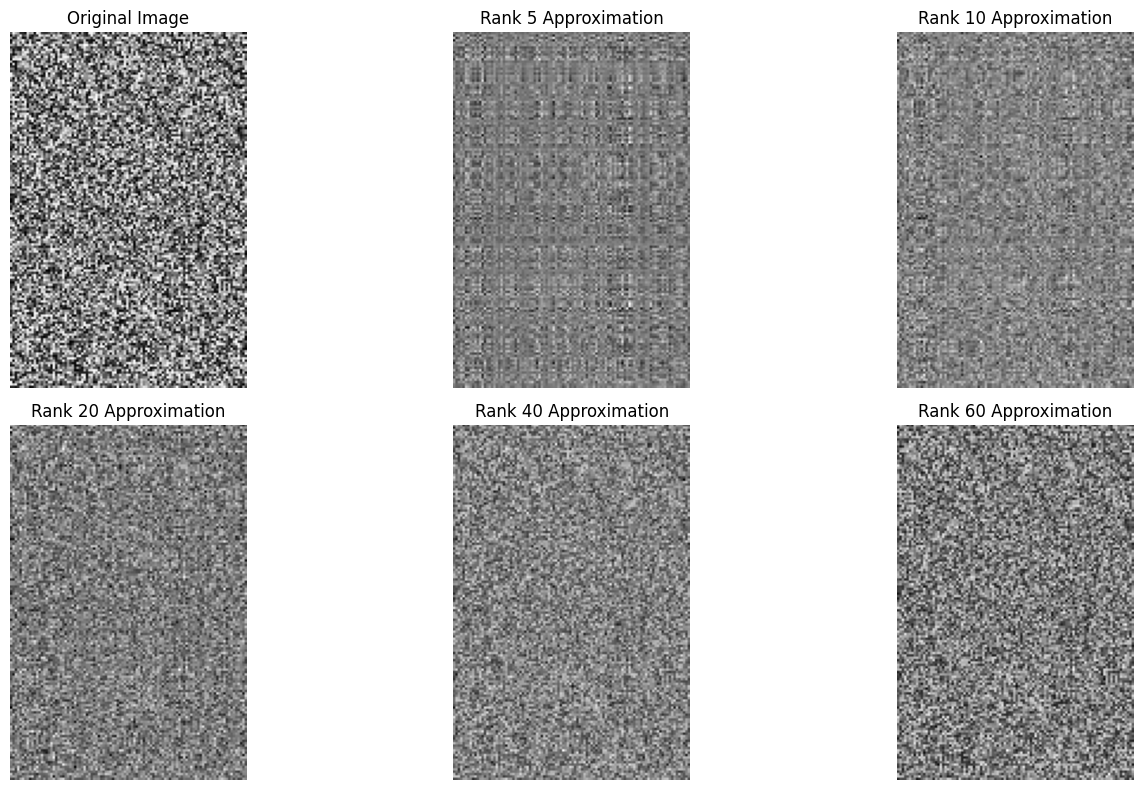

In [10]:
import matplotlib.pyplot as plt

# Function to reconstruct rank-k approximation
def reconstruct_rank_k(U, S, VT, k):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    return Uk @ Sk @ VTk

ks = [5, 10, 20, 40, 60]

# Plot original image and approximations
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(A, cmap='gray')
plt.axis('off')

for i, k in enumerate(ks, start=2):
    Ak = reconstruct_rank_k(U, S, VT, k)
    plt.subplot(2, 3, i)
    plt.title(f"Rank {k} Approximation")
    plt.imshow(Ak, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


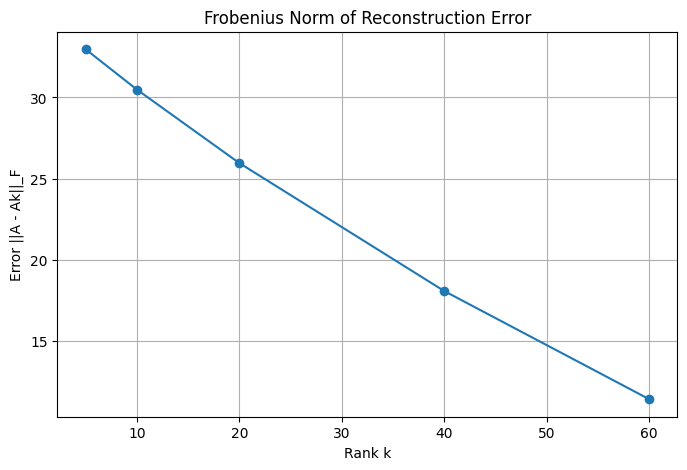

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Generate example image matrix A (150x100)
np.random.seed(42)
A = np.random.rand(150, 100)

# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Function to reconstruct rank-k approximation
def reconstruct_rank_k(U, S, VT, k):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    return Uk @ Sk @ VTk

ks = [5, 10, 20, 40, 60]
errors = []

# Compute reconstruction error in Frobenius norm for each k
for k in ks:
    Ak = reconstruct_rank_k(U, S, VT, k)
    Ek = norm(A - Ak, 'fro')
    errors.append(Ek)

# Plot error vs rank k
plt.figure(figsize=(8, 5))
plt.plot(ks, errors, marker='o')
plt.title('Frobenius Norm of Reconstruction Error')
plt.xlabel('Rank k')
plt.ylabel('Error ||A - Ak||_F')
plt.grid(True)
plt.show()


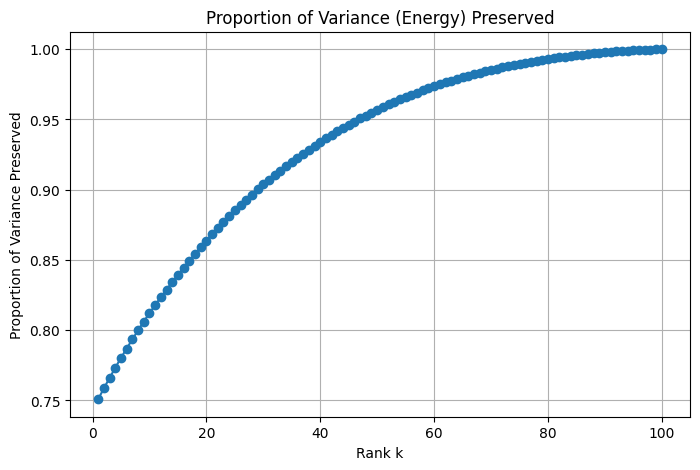

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assume A, U, S, VT already computed with SVD

rank = np.linalg.matrix_rank(A)
total_energy = np.sum(S**2)
energy_preserved = [np.sum(S[:k]**2) / total_energy for k in range(1, rank+1)]

plt.figure(figsize=(8, 5))
plt.plot(range(1, rank+1), energy_preserved, marker='o')
plt.title('Proportion of Variance (Energy) Preserved')
plt.xlabel('Rank k')
plt.ylabel('Proportion of Variance Preserved')
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import sympy as sp

# Define matrix M
M = np.array([[2, 1, 0], [1, 2, 1], [0, 1, 2]])

# (a) Characteristic polynomial using SymPy
x = sp.symbols('x')
M_sym = sp.Matrix(M)
char_poly = M_sym.charpoly(x).as_expr()
print("Characteristic polynomial of M:")
print(char_poly)

# Eigenvalues and eigenvectors using NumPy
eigenvalues_np, eigenvectors_np = np.linalg.eig(M)
print("\nEigenvalues of M:")
print(eigenvalues_np)

# Normalize eigenvectors
normalized_eigenvectors = eigenvectors_np / np.linalg.norm(eigenvectors_np, axis=0)
print("\nNormalized Eigenvectors of M (columns):")
print(normalized_eigenvectors)

# (b) Verify Mv = lambda v for each eigenvalue/vector
verification = [np.allclose(M @ normalized_eigenvectors[:, i], eigenvalues_np[i] * normalized_eigenvectors[:, i])
                for i in range(len(eigenvalues_np))]
print("\nVerification that Mv = lambda*v:")
print(verification)

# (c) Diagonalizability check (Symmetric matrix is diagonalizable)
is_diagonalizable = np.all(np.isreal(eigenvalues_np)) and np.linalg.matrix_rank(normalized_eigenvectors) == M.shape[0]
print(f"\nIs M diagonalizable? {'Yes' if is_diagonalizable else 'No'}")

# Construct D and P
D = np.diag(eigenvalues_np)
P = normalized_eigenvectors
P_inv = np.linalg.inv(P)

# Verify reconstruction
reconstructed = P @ D @ P_inv
print("\nReconstructed M from PDP^-1:")
print(np.round(reconstructed, decimals=6))


Characteristic polynomial of M:
x**3 - 6*x**2 + 10*x - 4

Eigenvalues of M:
[3.41421356 2.         0.58578644]

Normalized Eigenvectors of M (columns):
[[-5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01  4.05405432e-16 -7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]]

Verification that Mv = lambda*v:
[True, True, True]

Is M diagonalizable? Yes

Reconstructed M from PDP^-1:
[[ 2.  1. -0.]
 [ 1.  2.  1.]
 [-0.  1.  2.]]
